# Different Techniques for Feature Selection

    Feature selection is one of the most important phase in data preparation because it helps in reducing the curse 
    of dimensionality. It is a process of removing the number of input variables, which can negatively impact the 
    performance of the model. One advantage of feature selection is that it rescues the model from overfitting when we 
    have in datasets with high dimensionality.

    In this notebook, there are multiple techniques that can be used for feature selection based on the business case study
    and the data type.
    
    Please note, you will have to do feature engineering and perform train and test split before feature selection to avoid 
    any data leakage from test data to train data.

    Let's go ahead and explore these techniques. The data used is the 'mobile dataset - train data' from Kaggle. The link 
    is given below:

###### Dataset:https://www.kaggle.com/iabhishekofficial/mobile-price-classification

## Importing Libraries and Reading the Data

In [102]:
# Importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)

data = pd.read_csv('mobile_dataset.csv')

In [103]:
# Print the shape of the data and view top 3 records
print ('The shape of the data is {}'.format(data.shape))
data.head(5)

The shape of the data is (2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [104]:
# Splitting the dependent and independent variables
X = data.drop('price_range',axis=1)
Y = data['price_range']

## Feature Selection Methods

### 1. Dropping Constant Features (Variance Threshold)

    In our data, there could be some constant features that are not important in solving the problem statement. 
    This is because these features will have no variance, and will not add any value to the model.

    Variance Threshold is a technique that removes all low-variance features. This method looks only at the 
    independent features and not the desired output (dependent features). And, hence this is an advantage to be used
    in Unsupervised learning as well.

    By default, this technique takes a low variance threshold as '0', but it can be changed based on the problem statement.
    
    Advantage: Can be applied to unsupervised learning
    Disadvantage : Does not consider the relationship between input and output features

In [105]:
# Importing VarianceThreshold class from sklearn
from sklearn.feature_selection import VarianceThreshold
VT = VarianceThreshold()
# We will fit it on the independent variables only
VT.fit(X)

VarianceThreshold()

In [106]:
# Let's see the number of non-constant features
print ('The total number of non-constant features are {}'.format(len(VT.get_support())))

The total number of non-constant features are 20


In [108]:
# Identify constant features
constant_feature = [column for column in X.columns if column not in X.columns[VT.get_support()]]
print ('The constant features is/are {}'.format(constant_feature))

The constant features is/are []


    This means there are no constant features

### 2. Chi-square Test for Feature Selection (Univariate Selection)

    In this method, the chi-square statistics is calculated between each non-negative feature and class.
    The statistical analysis is performed based on hypothesis testing. Internally, it looks for p-value and 
    accordingly, arrange important features

    Thumb Rule - Chi-square test will return 2 values - F-score (This should be max) and P-value (This should be min)

    The scikit-learn library also provides  different filtering methods to select the 
    important features calculated based on the feature selection techniques:

    Two of the more popular methods include:

    Select the top k variables: SelectKBest (I often use SelectKBest myself.)
    Select the top percentile variables: SelectPercentile


In [109]:
# Select K best helps to pick the top k important feature
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [110]:
# Selecting TOP 10 important features
Important_features = SelectKBest(score_func=chi2,k=10)
Important_features.fit(X,Y)

# Identify important features
Imp_features = pd.DataFrame(Important_features.scores_,index=X.columns,columns=['Scores'])
Imp_features.nlargest(6,'Scores')

,Scores
ram,931267.519053
px_height,17363.569536
battery_power,14129.866576
px_width,9810.586750
mobile_wt,95.972863
int_memory,89.839124


    The above table shows the top 6 important features.

### 3. Feature Importance using ExtraTreesClassifier

    Feature importance gives you a score for each feature of your data, the higher the score more important or relevant 
    is the feature towards your output variable.
    
    Feature importance is an inbuilt class that comes with Tree-Based Classifiers, we will be using Extra Tree Classifier 
    for extracting the top 10 features for the dataset.
    
    You can use Extra Tree Regressor, in case of the Regression problem.

In [85]:
# Import the class and fit it on the data
from sklearn.ensemble import ExtraTreesClassifier
classfier = ExtraTreesClassifier()
classfier.fit(X,Y)

ExtraTreesClassifier()

<AxesSubplot:>

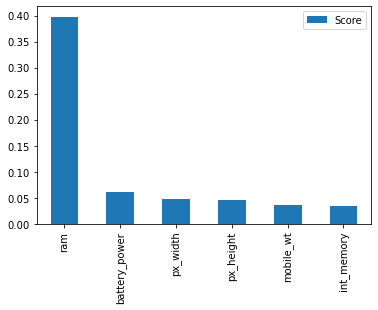

In [86]:
# View the iImportant features
Imp_feature = pd.DataFrame(classfier.feature_importances_,columns=['Score'],index=X.columns)
Imp_feature.nlargest(6,'Score').plot.bar()

    We can also compare the results obtained from chi-square and ExtraTreesClassifier. Note, that all the 6 important 
    features are some from both the techniques

### 4. Using Pearson Correlation (Numerical Data)

    This technique returns the Pearson correlation value between 2 variables which is between -1 to 1. 
    We remove highly correlated features. In general phenomenon, this threshold is taken as 0.85.

    A common mistake to avoid is that we do not remove features that are correlated with the dependent features. 
    Only correlated independent features are removed. Inverse correlation is important and we should keep that in our model.

<AxesSubplot:>

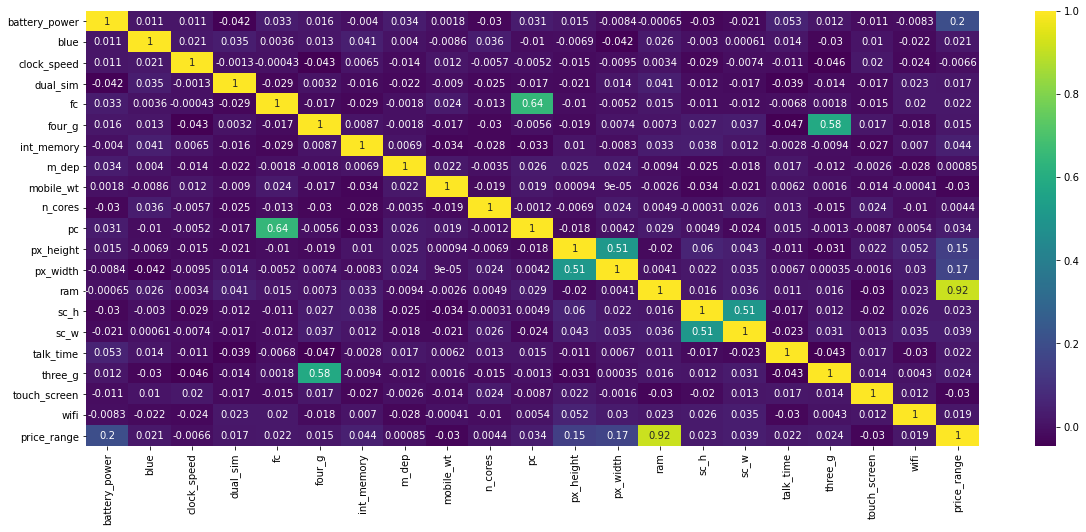

In [112]:
# Finding the corelation values
corr_mat = data.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr_mat,annot=True,cmap='viridis')

    We can see from the above heatmap that feature 'ram' and 'price_range' has Pearson-correlation as 0.92. Hence, they
    are highly correlated. But, we will not remove it as this is between independent and dependent features.

In [98]:
### Find and remove the corelated features (Useful in scenarios where we have multiple columns and graphical view is difficult)
threshold = 0.2
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [100]:
# Return the corelated features
corr_features = correlation(X, threshold)
print(corr_features)

{'px_width', 'pc', 'three_g', 'sc_w'}


    Hence, we can drop the above corelated features

### 5. Information Gain using Mutual Information

    Using this technique, we find the relation between the independent and dependent variable. MI between two random
    variables is a non-negative value, which measures the dependence between the variables. It is equal to '0' if the 
    two random variables 
    are independent, and a higher value means high dependency

    The mutual information score will be between 0 to 1. You can use Mutual Information Regressor for Regression Problems
    
    Advantage: It can capture a non-linear relationship between input and output

In [101]:
# Import the classifier
from sklearn.feature_selection import mutual_info_classif
mutual_classif = mutual_info_classif(X,Y)
MI = pd.DataFrame(mutual_classif,index=X.columns,columns=['Scores'])
MI.nlargest(6,'Scores')

,Scores
ram,0.846063
battery_power,0.029171
px_width,0.026328
wifi,0.021661
px_height,0.021637
three_g,0.018309


    These are the important features with respect to the above technique. 

